**1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:** 
а) зависимость цены на недвижимость в конкретном регионе от времени,
ценными для интерпретации м.б.: сезонность цен аренды загородной недвижимости или изменения цен на недвижимость (аренды и покупки) из года в год

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
скорость во время одного полета - наверное на поиск аномалий в случае обнаружения поломки по результатам полета, хотя вряд ли этот показатель как единичный хоть как-то можно интерпретировать
скорость полета в разные дни - возможно и будут закономерности и зависимости - например от времени суток или от сезонов - движение воздушных масс. Особенно в совокупности с избранием различных воздушных коридоров. 

в) количество отказов компьютера,
формально - можно, наверное, выстроить ряд. Правда, в реальности не представляю, что это за компьютер такой, который при этом сохранит работоспособность и  какая ценность.

г) число обращений в поликлинику по району,
сезонные показатели, в течение дня. Можно, одновременно, с признаками вида обращений. Например, как самое тривиальное - для планирования работы регистратуры и уборки помещений.

д) координаты автобуса при движении по маршруту,
именно координаты - вряд ли можно как-то интерпретировать. мне в голову ничего не приходит Разве что каждый раз преобразовывать в пройденное расстояние от начальной точки. Возник вопрос, что это за вид данных - координаты. Это ведь числовые интервальные данные, как температура, или как?

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - тут, честно говоря, не поняла, что имеется ввиду под координатами. Координаты относительно чего? На экране есть координаты?


**2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


## Данные для анализа

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
Прочитаем ежеденевно обновляемые данные из ссылки и загрузим себе.

"D:\AI\Machine learning\novel-corona-virus-2019-dataset\covid_19_data.csv"

In [2]:
covid = pd.read_csv('D:/AI/Machine learning/novel-corona-virus-2019-dataset/covid_19_data.csv')


In [3]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13204,13205,04/08/2020,Wyoming,US,2020-04-08 22:59:00,221.0,0.0,0.0
13205,13206,04/08/2020,Xinjiang,Mainland China,2020-04-08 22:59:00,76.0,3.0,73.0
13206,13207,04/08/2020,Yukon,Canada,2020-04-08 22:59:00,7.0,0.0,0.0
13207,13208,04/08/2020,Yunnan,Mainland China,2020-04-08 22:59:00,184.0,2.0,173.0
13208,13209,04/08/2020,Zhejiang,Mainland China,2020-04-08 22:59:00,1266.0,1.0,1232.0


Making a dataframe copy and working with it only
Выносим дату отдельным столбцом

In [4]:
covid_19 = covid.copy()
covid_19['Date']= pd.to_datetime(covid['ObservationDate']).dt.date

**Extracting and saving data on US**

In [5]:
covid_usa = covid_19.loc[covid_19['Country/Region']=='US', :]

In [6]:
covid_usa.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0,2020-01-23
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0,2020-01-24
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,2020-01-24
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0,2020-01-25


In [7]:
#checking date repeats; finding number of dates
if len(covid_usa['Date'].value_counts())==covid_usa['Date'].nunique():
    print(covid_usa['Date'].nunique())

78


In [8]:
covid_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 31 to 13204
Data columns (total 9 columns):
SNo                2614 non-null int64
ObservationDate    2614 non-null object
Province/State     2614 non-null object
Country/Region     2614 non-null object
Last Update        2614 non-null object
Confirmed          2614 non-null float64
Deaths             2614 non-null float64
Recovered          2614 non-null float64
Date               2614 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 204.2+ KB


In [9]:
covid_usa.describe()

,SNo,Confirmed,Deaths,Recovered
count,2614.000000,2614.000000,2614.000000,2614.000000
mean,6742.770849,1399.350803,35.271232,54.949120
std,3525.991335,7737.862146,248.135273,930.277204
min,32.000000,0.000000,0.000000,0.000000
25%,3965.250000,2.000000,0.000000,0.000000
50%,6323.500000,29.000000,0.000000,0.000000
75%,9699.750000,399.750000,6.000000,0.000000
max,13205.000000,151061.000000,6268.000000,23559.000000


Interesting max numbers
**Checking high numbers**

In [10]:
covid_usa.loc[covid_usa['Confirmed']>100000, :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
11559,11560,04/03/2020,New York,US,2020-04-03 22:52:45,102987.0,2935.0,0.0,2020-04-03
11875,11876,04/04/2020,New York,US,2020-04-04 23:41:02,113833.0,3565.0,0.0,2020-04-04
12193,12194,04/05/2020,New York,US,2020-04-05 23:13:44,123160.0,4159.0,0.0,2020-04-05
12513,12514,04/06/2020,New York,US,4/6/20 9:37,131815.0,4698.0,0.0,2020-04-06
12833,12834,04/07/2020,New York,US,2020-04-07 23:11:31,139875.0,5489.0,0.0,2020-04-07
13153,13154,04/08/2020,New York,US,2020-04-08 22:59:00,151061.0,6268.0,0.0,2020-04-08


In [11]:
covid_usa.loc[(covid_usa['Confirmed']>30000) & (covid_usa['Confirmed']<100001), :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
8759,8760,03/25/2020,New York,US,2020-03-25 23:37:49,30841.0,285.0,0.0,2020-03-25
9063,9064,03/26/2020,New York,US,2020-03-26 23:53:24,37877.0,385.0,0.0,2020-03-26
9370,9371,03/27/2020,New York,US,2020-03-27 23:27:48,44876.0,527.0,0.0,2020-03-27
9680,9681,03/28/2020,New York,US,2020-03-28 23:11:06,52410.0,728.0,0.0,2020-03-28
9991,9992,03/29/2020,New York,US,3/8/20 5:31,59648.0,965.0,0.0,2020-03-29
10303,10304,03/30/2020,New York,US,3/8/20 5:31,66663.0,1218.0,0.0,2020-03-30
10616,10617,03/31/2020,New York,US,2020-03-31 23:49:27,75833.0,1550.0,0.0,2020-03-31
10929,10930,04/01/2020,New York,US,2020-04-01 22:04:58,83948.0,1941.0,0.0,2020-04-01
11244,11245,04/02/2020,New York,US,2020-04-02 23:32:01,92506.0,2373.0,0.0,2020-04-02
11872,11873,04/04/2020,New Jersey,US,2020-04-04 23:41:02,34124.0,846.0,0.0,2020-04-04


In [12]:
covid_usa.loc[covid_usa['Deaths']>1000, :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
10303,10304,03/30/2020,New York,US,3/8/20 5:31,66663.0,1218.0,0.0,2020-03-30
10616,10617,03/31/2020,New York,US,2020-03-31 23:49:27,75833.0,1550.0,0.0,2020-03-31
10929,10930,04/01/2020,New York,US,2020-04-01 22:04:58,83948.0,1941.0,0.0,2020-04-01
11244,11245,04/02/2020,New York,US,2020-04-02 23:32:01,92506.0,2373.0,0.0,2020-04-02
11559,11560,04/03/2020,New York,US,2020-04-03 22:52:45,102987.0,2935.0,0.0,2020-04-03
11875,11876,04/04/2020,New York,US,2020-04-04 23:41:02,113833.0,3565.0,0.0,2020-04-04
12193,12194,04/05/2020,New York,US,2020-04-05 23:13:44,123160.0,4159.0,0.0,2020-04-05
12510,12511,04/06/2020,New Jersey,US,4/6/20 9:37,41090.0,1003.0,0.0,2020-04-06
12513,12514,04/06/2020,New York,US,4/6/20 9:37,131815.0,4698.0,0.0,2020-04-06
12830,12831,04/07/2020,New Jersey,US,2020-04-07 23:11:31,44416.0,1232.0,0.0,2020-04-07


In [13]:
covid_usa['Province/State'].value_counts()

Washington             40
Los Angeles, CA        38
Illinois               37
Arizona                36
San Benito, CA         36
                       ..
Carver County, MN       1
Ashland, NE             1
Cherokee County, GA     1
Lackland, TX            1
Travis, CA              1
Name: Province/State, Length: 199, dtype: int64

** working with data grouped by date through all the states **

In [14]:
covid_by_date = covid_usa.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum()
covid_by_date

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,5.0,0.0,0.0
...,...,...,...
2020-04-04,308850.0,8407.0,14652.0
2020-04-05,337072.0,9619.0,17448.0
2020-04-06,366667.0,10783.0,19581.0


In [15]:
covid_by_date.index = pd.to_datetime(covid_by_date.index)

In [16]:
covid_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2020-01-22 to 2020-04-08
Data columns (total 3 columns):
Confirmed    78 non-null float64
Deaths       78 non-null float64
Recovered    78 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


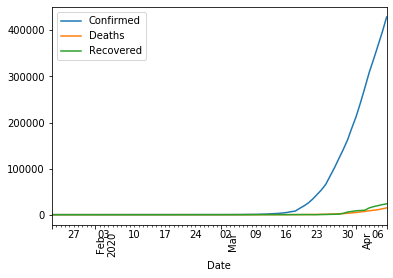

In [17]:
covid_by_date['Confirmed'].plot()
covid_by_date['Deaths'].plot()
covid_by_date['Recovered'].plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)
plt.legend()
plt.show()

before 15th of March

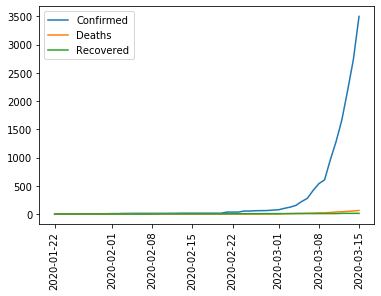

In [18]:
splitdate = pd.to_datetime('2020-03-15').date()
plt.plot((covid_by_date['Confirmed'].loc[:splitdate]), label='Confirmed')
plt.plot((covid_by_date['Deaths'].loc[:splitdate]), label='Deaths')
plt.plot((covid_by_date['Recovered'].loc[:splitdate]), label='Recovered')
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)
plt.legend()
plt.show()

from 100 confirmed cases to 100

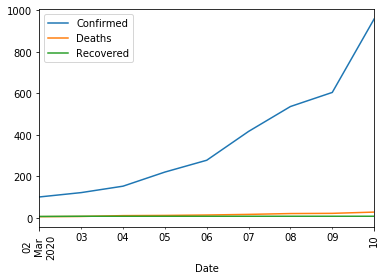

In [19]:
covid_by_date.loc[((covid_by_date['Confirmed'] > 100)& (covid_by_date['Confirmed'] < 1000)), :].plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)

plt.show()

Посмотрим на них в цифрах

In [20]:
cases_100_1000 = covid_by_date.loc[((covid_by_date['Confirmed'] > 100)& (covid_by_date['Confirmed'] < 1000)), :]
cases_100_1000

,Confirmed,Deaths,Recovered
Date,,,
2020-03-02,101.0,6.0,7.0
2020-03-03,122.0,7.0,8.0
2020-03-04,153.0,11.0,8.0
2020-03-05,221.0,12.0,8.0
2020-03-06,278.0,14.0,8.0
2020-03-07,417.0,17.0,8.0
2020-03-08,537.0,21.0,8.0
2020-03-09,605.0,22.0,8.0
2020-03-10,959.0,28.0,8.0


Сделаем первые разности (производную)

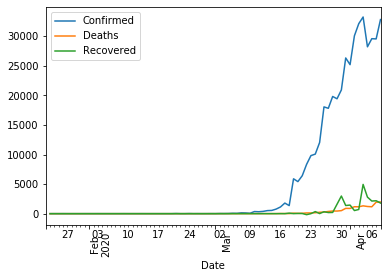

In [21]:
covid_by_date.diff(1).plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)

plt.show()

План - посмотреть отрезки с пиками и посмотреть отдельно данные по нью-йорку и нью-джерси


**3. вариант 2)** Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [22]:
us_3day = covid_by_date.resample("3D").std()
us_week = covid_by_date.resample("W").std()
us_2weeks = covid_by_date.resample("2W").std()

In [23]:
us_3day.head(3)

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,0.577350,0.0,0.0
2020-01-25,1.732051,0.0,0.0
2020-01-28,0.000000,0.0,0.0


Text(0.5, 1.0, 'интервал 2 недели')

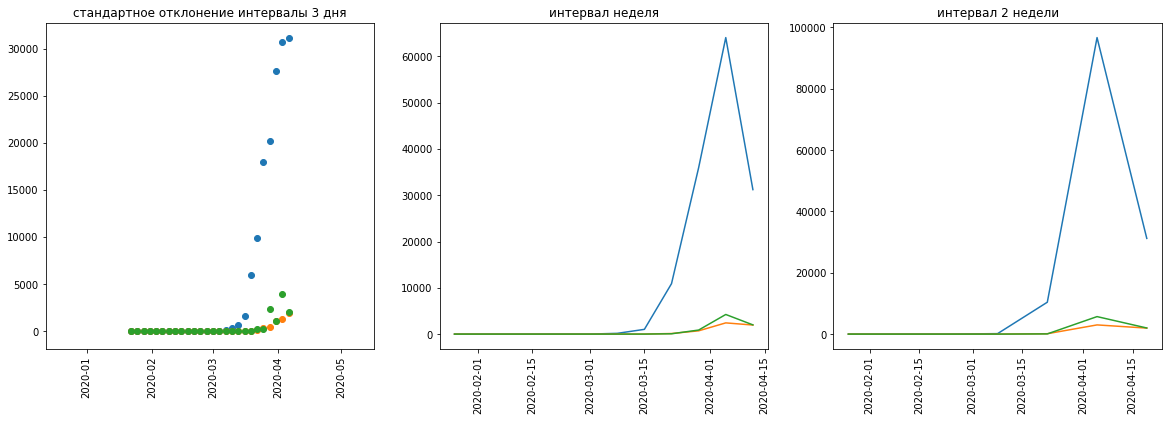

In [24]:
plt.figure(figsize = (20, 6))

# интервалы 3 дня
plt.subplot(1,3,1)
plt.scatter(us_3day.index, us_3day['Confirmed'])
plt.scatter(us_3day.index, us_3day['Deaths'])
plt.scatter(us_3day.index, us_3day['Recovered'])
plt.xticks(label = us_3day.index, rotation=90)
plt.title(f'стандартное отклонение интервалы 3 дня')

# неделя
plt.subplot(1,3,2)
plt.plot(us_week.index, us_week)
plt.xticks(label = us_week.index, rotation=90)
plt.title(f'интервал неделя')

#  2 недели
plt.subplot(1,3,3)
plt.plot(us_2weeks.index, us_2weeks)
plt.xticks(label = us_2weeks.index, rotation=90)
plt.title(f'интервал 2 недели')

In [25]:
us_3day_mean = covid_by_date.resample("3D").mean()
us_week_mean = covid_by_date.resample("W").mean()
us_2weeks_mean = covid_by_date.resample("2W").mean()

Text(0.5, 1.0, 'интервал 2 недели')

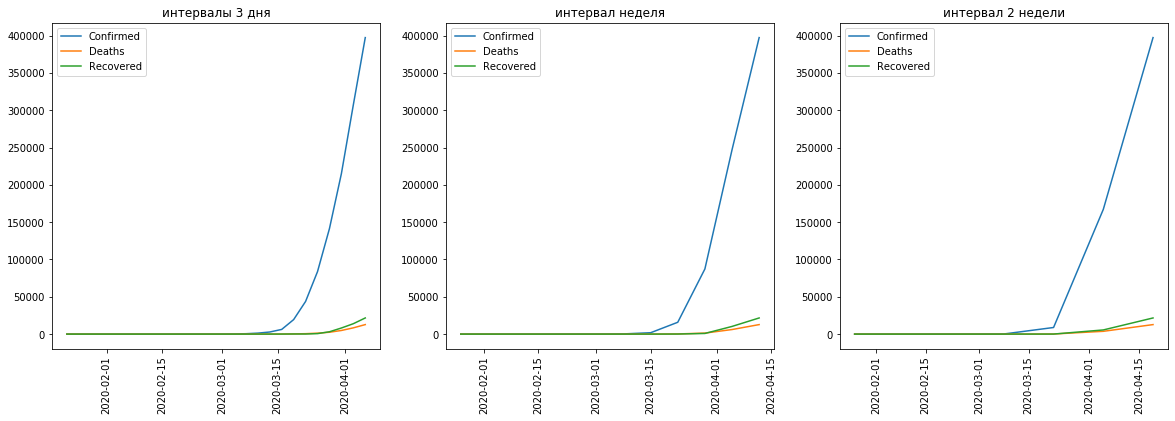

In [26]:
plt.figure(figsize = (20, 6))

# интервалы 3 дня
plt.subplot(1,3,1)
plt.plot(us_3day_mean.index, us_3day_mean)
plt.xticks(label = us_3day_mean.index, rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.title(f'интервалы 3 дня')

# неделя
plt.subplot(1,3,2)
plt.plot(us_week_mean.index, us_week_mean)
plt.xticks(label = us_week_mean.index, rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.title(f'интервал неделя')

#  2 недели
plt.subplot(1,3,3)
plt.plot(us_2weeks_mean.index, us_2weeks_mean)
plt.xticks(label = us_2weeks_mean.index, rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.title(f'интервал 2 недели')

**4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

Скачки в темпах роста и в среднеквадратичном отклонении по recovered и confirmed, а по смертям нет. Возможно зависит от процесса тестирования, его темпы могут быть различными. Странно, что в . Необходимо посмотреть те же показатели но по разным штатам, возможно, что там плавные однонаправленные изменения или по нормальное распределение.


In [27]:
#data with most deaths данные с уровнем смертности >500
mass_deaths_data = covid_usa.loc[covid_usa['Deaths']>500, :]
#NB there are counties/provinces, wich for some periods are given separately from their states

In [28]:
# список штатов с большим уровнем
states = mass_deaths_data['Province/State'].value_counts().index

In [29]:
states

Index(['New York', 'New Jersey', 'Michigan', 'Louisiana'], dtype='object')

In [30]:
# данные по самым пострадавшим штатам (по смертям)
covid_us_maxdeaths = covid_usa.loc[covid_usa['Province/State'].isin(states), :]

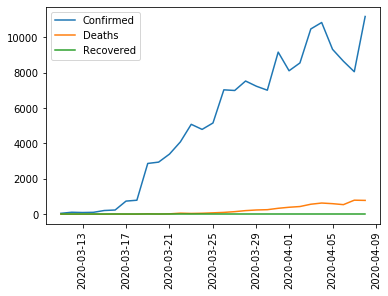

In [31]:
# in one state plain data
for state in states[:1]:
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Confirmed','Deaths','Recovered']].diff(1) )
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend(['Confirmed','Deaths','Recovered'])

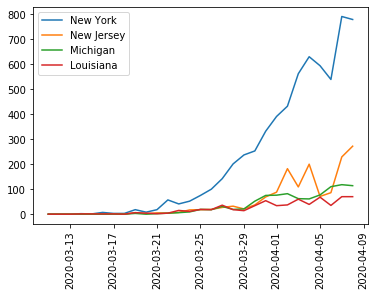

In [32]:
# differenciating death rates in max affected states
for state in states:
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Deaths']].diff(1), label=state)
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend()

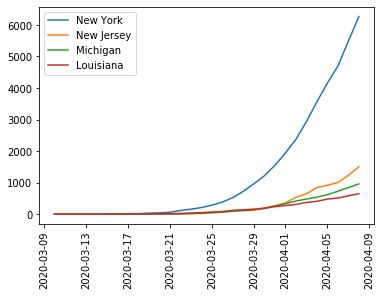

In [33]:
# death rates in max affected states
for state in states:
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Deaths']], label=state)
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend()

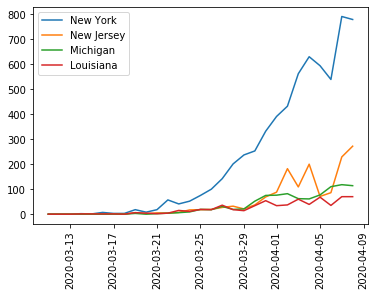

In [34]:
# differenciating confirmed/death/recovered/ rates in max affected states
for state in states:
    
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Deaths']].diff(1), label=state)
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend()

### сгладим данные, попробуем собрать среднее за каждые 3 дня

In [35]:
covid_us_maxdeaths.index = pd.to_datetime(covid_us_maxdeaths['Date'])

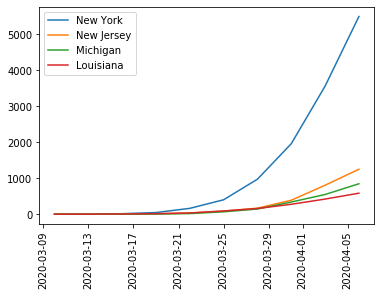

In [36]:
#
for state in states:
    one_state_deaths = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]), :]
    three_day_mean = one_state_deaths.resample("3D").mean()
    plt.plot(three_day_mean.index, three_day_mean['Deaths'], label=state)
    plt.xticks(label = three_day_mean.index, rotation=90)
    plt.legend()

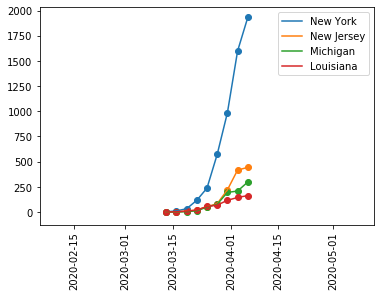

In [37]:
# diff
for state in states:
    one_state_deaths = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]), :]
    three_day_mean = one_state_deaths.resample("3D").mean()
    plt.scatter(three_day_mean.index, three_day_mean['Deaths'].diff(1))
    plt.plot(three_day_mean.index, three_day_mean['Deaths'].diff(1), label=state)
    plt.xticks(label = three_day_mean.index, rotation=90)
    plt.legend()

**При усреднении в пределах трех дней скачки темпов роста сглаживаются**
Дополнительные выводы делать сложно, так как рост даже до пика еще не дошел и пока даже прирост немного снизился только на последнем отрезке. В Нью-Йорке ситуация явно из всех учитываемых мест доведена до самой критической, а вот в Луизиане, кажется, удается flatten the curve.  Но,по крайней мере, признаков манипуляций не видно. Кажется, методику учета смертности они не меняли на всем протяжении измерений. BTW даже в NY пока хватает аппаратов и, прогнозируется, что хватит. Тем более хватает коек. Будет интересно посмотреть на данные через пару недель. В наши пока не хочется заглядывать, ибо как у нас "учитывают", я знаю очень хорошо.